<a href="https://colab.research.google.com/github/SmartPracticeschool/SBSPS-Challenge-2676-Wind-Power-Prediction/blob/master/IBM_Hackathon_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1pCEj7-CTiFENlw1XW6XHFTA6QisLSxNi"})   # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv')        # replace the file name with your file

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from fbprophet import Prophet
from datetime import datetime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [ ]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
data = data.rename(columns = {'Date/Time' : 'datetime' , 'LV ActivePower (kW)' : 'Active_Power', 'Theoretical_Power_Curve (KWh)' : 'Power_Curve'})
data.head()

,datetime,Active_Power,Wind Speed (m/s),Power_Curve,Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


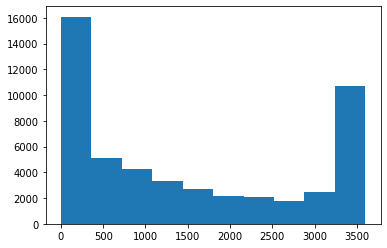

In [ ]:
plt.hist(data["Power_Curve"])
plt.show()

In [ ]:
data = data[data['Power_Curve'] > 500]

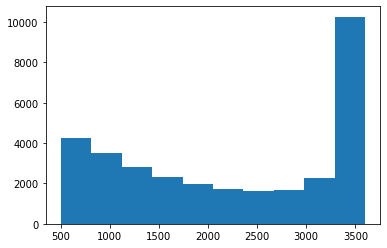

In [ ]:
plt.hist(data["Power_Curve"])
plt.show()

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
data['Months'] = data['datetime'].dt.month
data['Days'] = data['datetime'].dt.weekday
data['Date'] = data['datetime'].dt.date
data['Hourly'] = data['datetime'].dt.hour

In [ ]:
data['Hourly']

1         0
3         0
6         1
10        1
11        1
         ..
50525    23
50526    23
50527    23
50528    23
50529    23
Name: Hourly, Length: 32425, dtype: int64

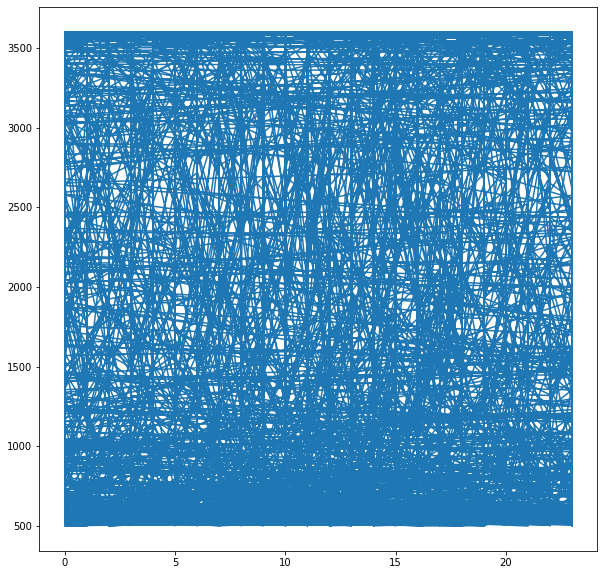

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(data['Hourly'], data['Power_Curve'])

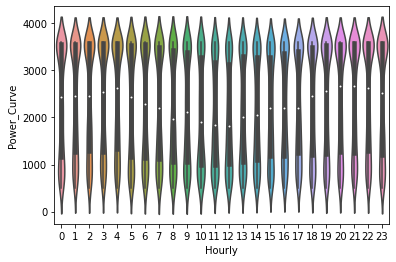

In [ ]:
sns.violinplot(y='Power_Curve', x = 'Hourly', data = data)

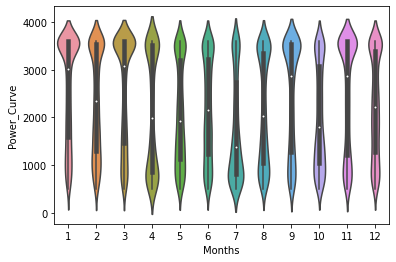

In [ ]:
sns.violinplot(y='Power_Curve', x = 'Months', data = data)

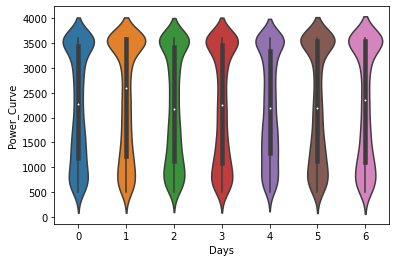

In [ ]:
sns.violinplot(y='Power_Curve', x = 'Days', data = data)

In [ ]:
df_prophet = data[['Date', 'Power_Curve' ]]

In [ ]:
df_prophet = df_prophet.rename(columns={'Date': 'ds' , 'Power_Curve': 'y'})

In [ ]:
df_prophet

,ds,y
1,2018-01-01,519.917511
3,2018-01-01,516.127569
6,2018-01-01,557.372363
10,2018-01-01,535.841397
11,2018-01-01,603.014077
...,...,...
50525,2018-12-31,3397.190793
50526,2018-12-31,1173.055771
50527,2018-12-31,1788.284755
50528,2018-12-31,2418.382503


In [ ]:
model = Prophet()

In [ ]:
model=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2)
model.add_seasonality(name='Hourly', period=30.5, fourier_order=5, prior_scale=0.02)

In [ ]:
model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Hourly,Hourly_lower,Hourly_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,-6484.666856,577.469132,4463.205637,-6484.666856,-6484.666856,480.924060,480.924060,480.924060,8924.274804,8924.274804,8924.274804,-42.823338,-42.823338,-42.823338,8486.174082,8486.174082,8486.174082,0.0,0.0,0.0,2439.607948
1,2018-01-01,-6484.666856,420.967296,4416.924248,-6484.666856,-6484.666856,480.924060,480.924060,480.924060,8924.274804,8924.274804,8924.274804,-42.823338,-42.823338,-42.823338,8486.174082,8486.174082,8486.174082,0.0,0.0,0.0,2439.607948
2,2018-01-01,-6484.666856,460.213668,4461.105770,-6484.666856,-6484.666856,480.924060,480.924060,480.924060,8924.274804,8924.274804,8924.274804,-42.823338,-42.823338,-42.823338,8486.174082,8486.174082,8486.174082,0.0,0.0,0.0,2439.607948
3,2018-01-01,-6484.666856,495.186311,4325.587973,-6484.666856,-6484.666856,480.924060,480.924060,480.924060,8924.274804,8924.274804,8924.274804,-42.823338,-42.823338,-42.823338,8486.174082,8486.174082,8486.174082,0.0,0.0,0.0,2439.607948
4,2018-01-01,-6484.666856,367.451661,4463.932617,-6484.666856,-6484.666856,480.924060,480.924060,480.924060,8924.274804,8924.274804,8924.274804,-42.823338,-42.823338,-42.823338,8486.174082,8486.174082,8486.174082,0.0,0.0,0.0,2439.607948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32785,2019-12-27,-102097.514999,-806876.757193,602882.378732,-815053.566329,595461.718514,198.448342,198.448342,198.448342,8111.916879,8111.916879,8111.916879,-53.598404,-53.598404,-53.598404,7967.066941,7967.066941,7967.066941,0.0,0.0,0.0,-93985.598120
32786,2019-12-28,-102360.951071,-809257.749240,604999.892693,-817379.729961,597797.552018,270.408122,270.408122,270.408122,8401.049865,8401.049865,8401.049865,11.795259,11.795259,11.795259,8118.846484,8118.846484,8118.846484,0.0,0.0,0.0,-93959.901206
32787,2019-12-29,-102624.387143,-810792.278727,608694.752211,-820085.328764,600133.385522,202.509385,202.509385,202.509385,8526.883183,8526.883183,8526.883183,76.871458,76.871458,76.871458,8247.502340,8247.502340,8247.502340,0.0,0.0,0.0,-94097.503960
32788,2019-12-30,-102887.823214,-813579.986562,610521.163835,-822837.608412,601559.477163,107.705481,107.705481,107.705481,8415.766709,8415.766709,8415.766709,-42.823338,-42.823338,-42.823338,8350.884565,8350.884565,8350.884565,0.0,0.0,0.0,-94472.056506


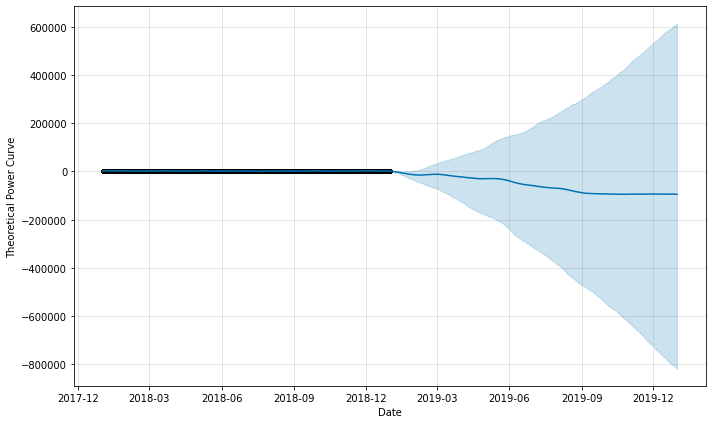

In [ ]:
image = model.plot(forecast, xlabel = 'Date', ylabel = 'Theoretical Power Curve')

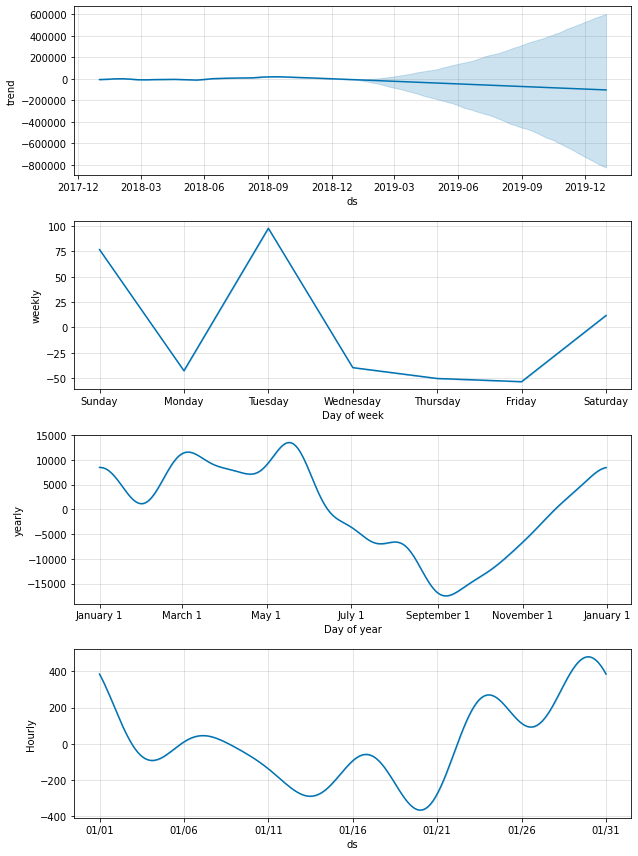

In [ ]:
model.plot_components(forecast);

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='100 days', period='180 days', horizon = '10 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-06-24 00:00:00 and 2018-12-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-25,3824.597678,1801.844077,5637.219840,2947.865565,2018-06-24
1,2018-06-25,3824.597678,1658.604624,5663.446995,2112.039444,2018-06-24
2,2018-06-25,3824.597678,1975.268981,5699.775039,2944.520877,2018-06-24
3,2018-06-25,3824.597678,1882.668110,5652.015922,2934.821805,2018-06-24
4,2018-06-25,3824.597678,1900.876502,5691.257100,2364.219967,2018-06-24


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,2.452323e+06,1565.989481,1464.497245,0.564848,0.515168,0.857639
1,2 days,1.034585e+07,3216.496462,2517.034946,2.186533,0.573275,0.609442
2,3 days,1.972191e+07,4440.936143,3438.365796,2.532437,0.454929,0.642857
3,4 days,5.231527e+07,7232.929593,5129.255374,4.111305,0.710554,0.543396
4,5 days,1.353660e+08,11634.687699,9888.220942,6.316367,4.257815,0.304762


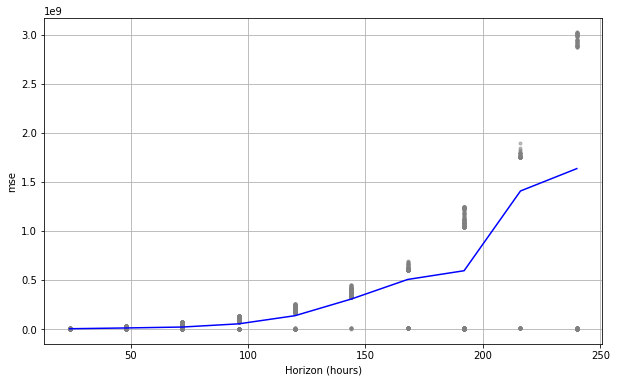

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-25,3824.597678,1801.844077,5637.219840,2947.865565,2018-06-24
1,2018-06-25,3824.597678,1658.604624,5663.446995,2112.039444,2018-06-24
2,2018-06-25,3824.597678,1975.268981,5699.775039,2944.520877,2018-06-24
3,2018-06-25,3824.597678,1882.668110,5652.015922,2934.821805,2018-06-24
4,2018-06-25,3824.597678,1900.876502,5691.257100,2364.219967,2018-06-24


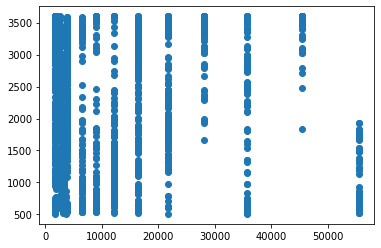

In [ ]:
plt.scatter(df_cv['yhat'], df_cv['y'] ) 
plt.show()

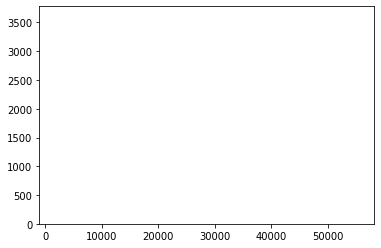

In [ ]:
plt.bar(df_cv['yhat'], df_cv['y'], label="Blue Bar", color='b') 
plt.show()